# SkimLit

## Preprocess Data

### Get Data
```
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']
 ```

### Function to read the lines of a document

```
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()
```

```
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one
```
```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n',
 '###24854809\n',
 'BACKGROUND\tEmotional eating is associated with overeating and the development of obesity .\n',
 'BACKGROUND\tYet , empirical evidence for individual ( trait ) differences in emotional eating and cognitive mechanisms that contribute to eating during sad mood remain equivocal .\n',
 'OBJECTIVE\tThe aim of this study was to test if attention bias for food moderates the effect of self-reported emotional eating during sad mood ( vs neutral mood ) on actual food intake .\n',
 'OBJECTIVE\tIt was expected that emotional eating is predictive of elevated attention for food and higher food intake after an experimentally induced sad mood and that attentional maintenance on food predicts food intake during a sad versus a neutral mood .\n',
 'METHODS\tParticipants ( N = @ ) were randomly assigned to one of the two experimental mood induction conditions ( sad/neutral ) .\n']
 ```

### Preprocess data function
```
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts
  
  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list
    
    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples
```



### Get data from file and preprocess it
```
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 344 ms, sys: 77.2 ms, total: 421 ms
Wall time: 420 ms
(180040, 30212, 30135)
```
```
# Check the first abstract of our training data
train_samples[:14]
```
```
[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
  'line_number': 4,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
  'line_number': 5,
  'total_lines': 11},
 {'target': 'RESULTS',
  'text': 'there was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , pga , and @mwd at @ weeks .',
  'line_number': 6,
  'total_lines': 11},
 {'target': 'RESULTS',
  'text': 'the mean difference between treatment arms ( @ % ci ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .',
  'line_number': 7,
  'total_lines': 11},
 {'target': 'RESULTS',
  'text': 'further , there was a clinically relevant reduction in the serum levels of il-@ , il-@ , tnf - , and hscrp at @ weeks in the intervention group when compared to the placebo group .',
  'line_number': 8,
  'total_lines': 11},
 {'target': 'RESULTS',
  'text': 'these differences remained significant at @ weeks .',
  'line_number': 9,
  'total_lines': 11},
 {'target': 'RESULTS',
  'text': 'the outcome measures in rheumatology clinical trials-osteoarthritis research society international responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .',
  'line_number': 10,
  'total_lines': 11},
 {'target': 'CONCLUSIONS',
  'text': 'low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee oa ( clinicaltrials.gov identifier nct@ ) .',
  'line_number': 11,
  'total_lines': 11},
 {'target': 'BACKGROUND',
  'text': 'emotional eating is associated with overeating and the development of obesity .',
  'line_number': 0,
  'total_lines': 10},
 {'target': 'BACKGROUND',
  'text': 'yet , empirical evidence for individual ( trait ) differences in emotional eating and cognitive mechanisms that contribute to eating during sad mood remain equivocal .',
  'line_number': 1,
  'total_lines': 10}]
```


### Turn our list of dictionaries into pandas DataFrame's so we visualize them better
```
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)
```
```
target	text	line_number	total_lines
0	OBJECTIVE	to investigate the efficacy of @ weeks of dail...	0	11
1	METHODS	a total of @ patients with primary knee oa wer...	1	11
2	METHODS	outcome measures included pain reduction and i...	2	11
3	METHODS	pain was assessed using the visual analog pain...	3	11
4	METHODS	secondary outcome measures included the wester...	4	11
5	METHODS	serum levels of interleukin @ ( il-@ ) , il-@ ...	5	11
6	RESULTS	there was a clinically relevant reduction in t...	6	11
7	RESULTS	the mean difference between treatment arms ( @...	7	11
8	RESULTS	further , there was a clinically relevant redu...	8	11
9	RESULTS	these differences remained significant at @ we...	9	11
10	RESULTS	the outcome measures in rheumatology clinical ...	10	11
11	CONCLUSIONS	low-dose oral prednisolone had both a short-te...	11	11
12	BACKGROUND	emotional eating is associated with overeating...	0	10
13	BACKGROUND	yet , empirical evidence for individual ( trai...	1	10
```

### Convert abstract text lines into lists
```
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)
```
```
(180040, 30212, 30135)
```
```
# View first 10 lines of training sentences
train_sentences[:10]
```
```
['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , pga , and @mwd at @ weeks .',
 'the mean difference between treatment arms ( @ % ci ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .',
 'further , there was a clinically relevant reduction in the serum levels of il-@ , il-@ , tnf - , and hscrp at @ weeks in the intervention group when compared to the placebo group .',
 'these differences remained significant at @ weeks .']
 ```

### One hot encode labels
```
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot
```
```
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])
```

### Label Encode Labels
```
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])
```

### Get class names and number of classes from LabelEncoder instance
```
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names
```
```
(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))
```

## Model 0: Getting a baseline
```
### TF-IDF Multinomial Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_labels_encoded);
```
```
model_0.score(X=val_sentences,
              y=val_labels_encoded)
```
```
0.7218323844829869
```
```
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds
```
```
array([4, 1, 3, ..., 4, 4, 1])
```

## Get Helper Functions
```
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
```
```
# Import calculate_results helper function
from helper_functions import calculate_results
```
```
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results
```
```
{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}
```


### How long is each sentence on average?

```
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777
```

### What's the distribution look like?
```
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);
```
```
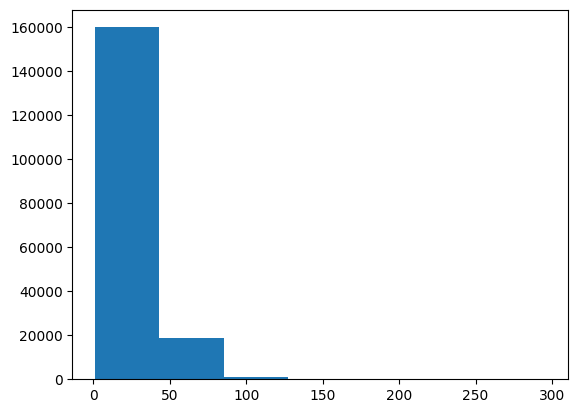

### How long of a sentence covers 95% of the lengths?
Sentences with a length below 55 get padded with zeros and sentences with a length above 55 get truncated (words after 55 get cut off).

We could use the max sentence length of the sentences in the training set.

```
# Maximum sentence length in the training set
max(sent_lens)
```
```
296
```

However, since hardly any sentences even come close to the max length, it would mean the majority of the data we pass to our model would be zeros (sinces all sentences below the max length would get padded with zeros).

```
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len
```

## Create text vectorizer


### How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
```
max_tokens = 68000
```


### Create text vectorizer
```
# After TensorFlow 2.6
from tensorflow.keras.layers import TextVectorization

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences
```

### Adapt text vectorizer to training sentences
```
text_vectorizer.adapt(train_sentences)
```

### Test out text vectorizer
```
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")
```
```
Text:
patients later completed a ten-question true-or-false knowledge questionnaire and a six-item satisfaction survey .

Length of text: 14

Vectorized text:
[[   12   869   253     8 44042 43177   494   325     3     8 34340   428
    885     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]
```

### How many words in our training vocabulary?
```
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")
```


### Get the config of our text vectorizer
```
text_vectorizer.get_config()
```
```
{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}
```

## Create custom token embedding layer
```
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")
```
```
Sentence before vectorization:
patients later completed a ten-question true-or-false knowledge questionnaire and a six-item satisfaction survey .

Sentence after vectorization (before embedding):
[[   12   869   253     8 44042 43177   494   325     3     8 34340   428
    885     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.03009653 -0.00744227  0.03255219 ...  0.04350514  0.02615802
    0.01004974]
  [ 0.00894579 -0.04471136  0.04325384 ...  0.00689     0.03921053
   -0.01831497]
  [ 0.0371519   0.01963044 -0.0322178  ...  0.01794907 -0.00109234
    0.02466574]
  ...
  [ 0.03691586 -0.00786442 -0.04396362 ...  0.04501832  0.00408162
   -0.02123723]
  [ 0.03691586 -0.00786442 -0.04396362 ...  0.04501832  0.00408162
   -0.02123723]
  [ 0.03691586 -0.00786442 -0.04396362 ...  0.04501832  0.00408162
   -0.02123723]]]

Embedded sentence shape: (1, 55, 128)
```

## Use tf.data API to create PrefetchDatasets
```
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset
```
```
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>
```

## Take the TensorSliceDataset's and turn them into prefetched batches
```
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset
```
```
<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>
```

## Model 1: Conv1D with token embeddings
```
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```

### Get summary of Conv1D model
```
model_1.summary()
```
```
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
=================================================================
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params:0
```

### Fit the model
```
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches
```

### Evaluate on whole validation dataset (we only validated on 10% of batches during training)
```
model_1.evaluate(valid_dataset)

945/945 [==============================] - 2s 3ms/step - loss: 0.5993 - accuracy: 0.7856
[0.5992922186851501, 0.7856481075286865]
```


### Make predictions (our model outputs prediction probabilities for each class)
```
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs
```
```
945/945 [==============================] - 2s 2ms/step
array([[4.2276028e-01, 1.9543630e-01, 7.8329526e-02, 2.7373073e-01,
        2.9743196e-02],
       [4.6485636e-01, 2.7058390e-01, 1.1763435e-02, 2.4558942e-01,
        7.2069145e-03],
       [1.4821406e-01, 4.6900036e-03, 1.9654778e-03, 8.4511346e-01,
        1.7043541e-05],
       ...,
       [4.6908235e-06, 6.0919154e-04, 7.0814672e-04, 2.9213641e-06,
        9.9867505e-01],
       [4.5269396e-02, 4.8612341e-01, 8.2452036e-02, 5.5686332e-02,
        3.3046886e-01],
       [1.8509193e-01, 6.2405616e-01, 5.6467425e-02, 5.4003950e-02,
        8.0380574e-02]], dtype=float32)
```

### Convert pred probs to classes
```
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds
```
```
<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>
```

### Calculate model_1 results
```
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.56480868529061,
 'precision': 0.7824092300813684,
 'recall': 0.7856480868529061,
 'f1': 0.7829939778477344}
```

## Model 2: Feature extraction with pretrained token embeddings
```
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")
```

### Test out the embedding on a random sentence
```
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")
```
```
Random training sentence:
our data justify the need for personalized integrated antioxidant and energy correction therapy .

Sentence after embedding:
[-0.03416213 -0.05093268 -0.07358423  0.04783727 -0.05375864  0.07531483
 -0.0618328  -0.00023192  0.05290754  0.00731164  0.02909756 -0.03293613
 -0.05592315  0.02519475 -0.08728898 -0.02306924 -0.06509812  0.01185254
 -0.05143833 -0.01459878  0.03741732  0.05964429  0.03533797  0.05038223
  0.00830391 -0.05242855  0.05673083 -0.06287023  0.08674113  0.06334175] (truncated output)...

Length of sentence embedding:
512
```

### Building and fitting an NLP feature extraction model from TensorFlow Hub
```
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```

### Get a summary of the model
```
model_2.summary()
```
```
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
=================================================================
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________
```

### Fit feature extractor model for 3 epochs
```
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))
```

### Evaluate on whole validation dataset
```
model_2.evaluate(valid_dataset)

945/945 [==============================] - 8s 8ms/step - loss: 0.7349 - accuracy: 0.7161
[0.7349329590797424, 0.7161061763763428]
```

### Make predictions with feature extraction model
```
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs
```
```
945/945 [==============================] - 8s 8ms/step - loss: 0.7349 - accuracy: 0.7161
[0.7349329590797424, 0.7161061763763428]
```

### Make predictions with feature extraction model
```
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs
```
```
945/945 [==============================] - 8s 8ms/step
array([[4.1435534e-01, 3.6443055e-01, 2.5627650e-03, 2.1054386e-01,
        8.1075458e-03],
       [3.4644338e-01, 4.7939345e-01, 4.0907143e-03, 1.6641928e-01,
        3.6531438e-03],
       [2.3935708e-01, 1.6314813e-01, 1.9130943e-02, 5.4523116e-01,
        3.3132695e-02],
       ...,
       [2.2427505e-03, 5.5871238e-03, 4.6554163e-02, 7.6473231e-04,
        9.4485116e-01],
       [3.8972907e-03, 4.4690356e-02, 2.0484674e-01, 1.4869794e-03,
        7.4507862e-01],
       [1.5384717e-01, 2.5815260e-01, 5.2709770e-01, 7.3189661e-03,
        5.3583570e-02]], dtype=float32)
```

### Convert the predictions with feature extraction model to classes
```
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds
```
```
<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>
```

### Calculate results from TF Hub pretrained embeddings results on validation set
```
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results
```

### Make function to split sentences into characters
```
def split_chars(text):
  return " ".join(list(text))
```
```
# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)
```
```
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])
```


### What's the average character length?
```
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len
```

### Check the distribution of our sequences at character-level
```
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);
```

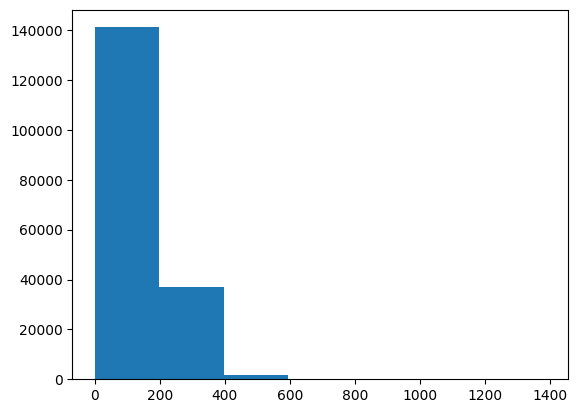

### Find what character length covers 95% of sequences
```
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len
```
```
290
````

### Get all keyboard characters for char-level embedding
```
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet
```

### Create char-level token vectorizer instance
```
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)
```
```
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")
```
```
Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']
```

### Test out character vectorizer
```
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")
```
```
Charified text:
e x a m i n e   t h e   r e l a t i o n s h i p   o f   d e m o g r a p h i c s   a n d   h e a l t h   c o n d i t i o n s   ,   a l o n e   a n d   i n   c o m b i n a t i o n   ,   o n   o b j e c t i v e   m e a s u r e s   o f   c o g n i t i v e   f u n c t i o n   i n   a   l a r g e   s a m p l e   o f   c o m m u n i t y - d w e l l i n g   o l d e r   a d u l t s   .

Length of chars: 162

Vectorized chars:
[[ 2 24  5 15  4  6  2  3 13  2  8  2 12  5  3  4  7  6  9 13  4 14  7 17
  10  2 15  7 18  8  5 14 13  4 11  9  5  6 10 13  2  5 12  3 13 11  7  6
  10  4  3  4  7  6  9  5 12  7  6  2  5  6 10  4  6 11  7 15 22  4  6  5
   3  4  7  6  7  6  7 22 27  2 11  3  4 21  2 15  2  5  9 16  8  2  9  7
  17 11  7 18  6  4  3  4 21  2 17 16  6 11  3  4  7  6  4  6  5 12  5  8
  18  2  9  5 15 14 12  2  7 17 11  7 15 15 16  6  4  3 19 10 20  2 12 12
   4  6 18  7 12 10  2  8  5 10 16 12  3  9  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]

Length of vectorized chars: 290
```

### Create char embedding layer
```
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")
```
```
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")
```

### Building a Conv1D model to fit on character embeddings

```
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
```

### Check the summary of conv1d_char_model
```
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
=================================================================
Total params: 10,139
Trainable params: 10,139
Non-trainable params: 0
_________________________________________________________________
```

### Create char datasets
```
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset
```
```
<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>
```

### To save time with our experiments, we'll fit the character-level model on 10% of batches.

```
#Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))
```
```
Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2876 - accuracy: 0.4835 - val_loss: 1.0503 - val_accuracy: 0.5934
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9992 - accuracy: 0.6053 - val_loss: 0.9375 - val_accuracy: 0.6330
Epoch 3/3
562/562 [==============================] - 2s 4ms/step - loss: 0.9217 - accuracy: 0.6366 - val_loss: 0.8723 - val_accuracy: 0.6576
```

### Evaluate model_3 on whole validation char dataset
```
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.8830 - accuracy: 0.6543
[0.8829597234725952, 0.6543095707893372]
```

### Make predictions with character model only
```
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs
```
```
945/945 [==============================] - 2s 2ms/step
array([[0.16555832, 0.40962285, 0.10694715, 0.24029495, 0.07757679],
       [0.15813953, 0.53640217, 0.01517234, 0.26619416, 0.02409185],
       [0.12398545, 0.23686218, 0.16067787, 0.41156322, 0.06691124],
       ...,
       [0.03653853, 0.05342488, 0.29759905, 0.0883414 , 0.52409613],
       [0.07498587, 0.1934537 , 0.29657316, 0.10817684, 0.3268104 ],
       [0.3868036 , 0.46745342, 0.07763865, 0.04975864, 0.01834559]],
      dtype=float32)
```

### Convert predictions to classes
```
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds
```

### Calculate Conv1D char only model results
```
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results
```
```
<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>
```
```
{'accuracy': 65.4309545875811,
 'precision': 0.6475618110732863,
 'recall': 0.6543095458758109,
 'f1': 0.6428526324260226}
```

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

This hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer.

Steps:
1. Create a token-level model (similar to model_1)
2. Create a character-level model (similar to model_3 with a slight modification to reflect the paper)
3. Combine (using layers.Concatenate) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

### Build Model
```
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")
```

### Compile token char model
```
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])
```

### Combining token and character data into a tf.data dataset
```

# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
```
```
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset
```
```
(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)
```


### Fitting a model on token and character-level sequences
```
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))
```


### Make Predictions
```
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs
```
```
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results
```
```
{'accuracy': 73.5039057328214,
 'precision': 0.737718289862149,
 'recall': 0.735039057328214,
 'f1': 0.7310235703293549}
```

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

You might've noticed this when we created our preprocess_text_with_line_numbers() function. When we read in a text file of abstracts, we counted the number of lines in an abstract as well as the number of each line itself.

Doing this led to the "line_number" and "total_lines" columns of our DataFrames.
```
# Inspect training dataframe
train_df.head()
```
```

target	text	line_number	total_lines
0	OBJECTIVE	to investigate the efficacy of @ weeks of dail...	0	11
1	METHODS	a total of @ patients with primary knee oa wer...	1	11
2	METHODS	outcome measures included pain reduction and i...	2	11
3	METHODS	pain was assessed using the visual analog pain...	3	11
4	METHODS	secondary outcome measures included the wester...	4	11
```



### How many different line numbers are there?
```
train_df["line_number"].value_counts()
```
```
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64
```

### Check the distribution of "line_number" column
```
train_df.line_number.plot.hist()
```
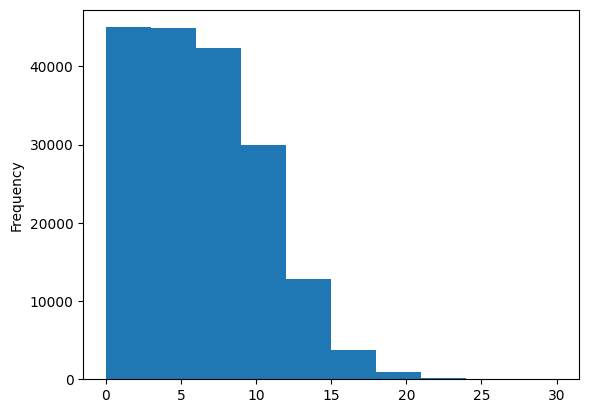

Looking at the distribution of the "line_number" column, it looks like the majority of lines have a position of 15 or less.

Knowing this, let's set the depth parameter of tf.one_hot to 15.

### Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
```
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)
```
```
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]
```
```
(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>)
```

### How many different numbers of lines are there?
```
train_df["total_lines"].value_counts()
```
```
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64
```
```
# Check the distribution of total lines
train_df.total_lines.plot.hist();
```
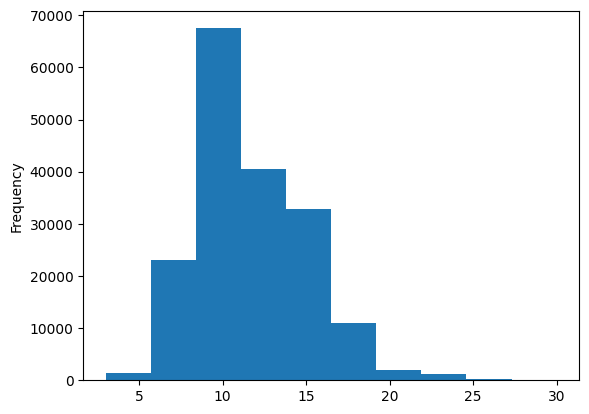

### Check the coverage of a "total_lines" value of 20
```
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples
20.0
```

### Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
```
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]
```
```

# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]
(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>)

```

### Building a tribrid embedding model

1. Create a token-level model (similar to model_1)
2. Create a character-level model (similar to model_3 with a slight modification to reflect the paper)
3. Create a "line_number" model (takes in one-hot-encoded "line_number" tensor and passes it through a non-linear layer)
4. Create a "total_lines" model (takes in one-hot-encoded "total_lines" tensor and passes it through a non-linear layer)
5. Combine (using layers.Concatenate) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts
6. Combine (using layers.Concatenate) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding
7. Create an output layer to accept the tribrid embedding and output predicted label probabilities
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a tf.keras.Model

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

### Create tribrid embedding datasets and fit tribrid model


This time our model requires four feature inputs:

1. Train line numbers one-hot tensor (train_line_numbers_one_hot)
2. Train total lines one-hot tensor (train_total_lines_one_hot)
3. Token-level sequences tensor (train_sentences)
4. Char-level sequences tensor (train_chars)

```
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset
```
```
(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)
```

### Fit the token, char and positional embedding model
```
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))
```

### Make predictions with token-char-positional hybrid model
```
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs
```
```
945/945 [==============================] - 13s 13ms/step
array([[0.47378692, 0.11392056, 0.01195277, 0.37507388, 0.02526585],
       [0.50771445, 0.12806556, 0.04414373, 0.31101325, 0.00906302],
       [0.26883593, 0.11979864, 0.13117212, 0.4081741 , 0.07201922],
       ...,
       [0.03447666, 0.10706001, 0.04599329, 0.03351728, 0.7789528 ],
       [0.03275388, 0.31916243, 0.09343442, 0.02761328, 0.527036  ],
       [0.25131708, 0.54850894, 0.1116215 , 0.04071589, 0.04783657]],
      dtype=float32)
```
```
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds
```
```
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results
```
```
{'accuracy': 83.20203892493049,
 'precision': 0.8307701956480288,
 'recall': 0.8320203892493049,
 'f1': 0.8311131749119387}
```

## Combine model results into a DataFrame
```
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results
```
```
	         accuracy	precision	recall	f1
baseline	72.183238	0.718647	0.721832	0.698925
custom_token_embed_conv1d	78.564809	0.782409	0.785648	0.782994
pretrained_token_embed	71.610618	0.716161	0.716106	0.712831
custom_char_embed_conv1d	65.430955	0.647562	0.654310	0.642853
hybrid_char_token_embed	73.503906	0.737718	0.735039	0.731024
tribrid_pos_char_token_embed	83.202039	0.830770	0.832020	0.831113
```

### Visualize Results
```
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
```

### Plot and compare all of the model results
```
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));
```
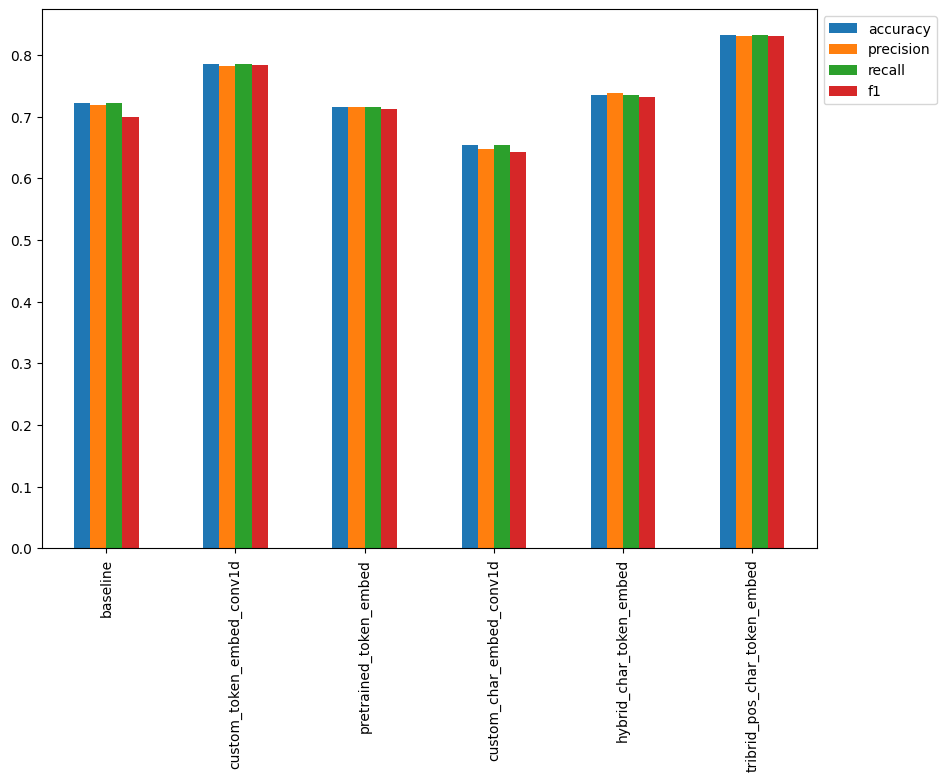

### Sort model results by f1-score
```
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));
```
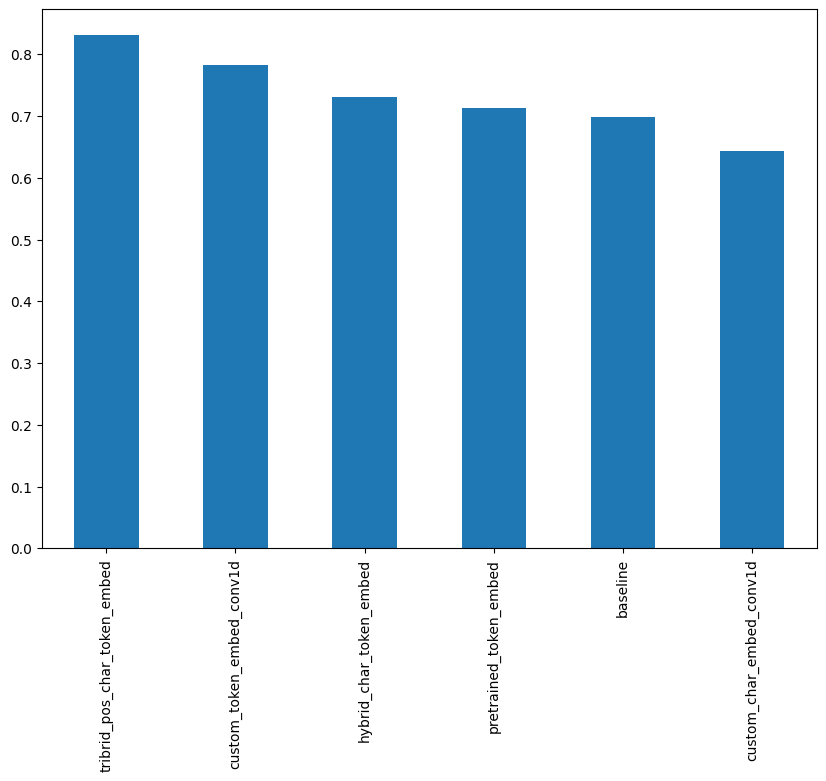

### Create prediction-enriched test dataframe
```
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)
```
```
target	text	line_number	total_lines	prediction	pred_prob	correct
0	BACKGROUND	this study analyzed liver function abnormaliti...	0	8	OBJECTIVE	0.523977	False
1	RESULTS	a post hoc analysis was conducted with the use...	1	8	OBJECTIVE	0.351961	False
2	RESULTS	liver function tests ( lfts ) were measured at...	2	8	METHODS	0.802363	False
3	RESULTS	survival analyses were used to assess the asso...	3	8	METHODS	0.652682	False
4	RESULTS	the percentage of patients with abnormal lfts ...	4	8	RESULTS	0.665139	True
5	RESULTS	when mean hemodynamic profiles were compared i...	5	8	RESULTS	0.881854	True
6	RESULTS	multivariable analyses revealed that patients ...	6	8	RESULTS	0.529604	True
7	CONCLUSIONS	abnormal lfts are common in the adhf populatio...	7	8	CONCLUSIONS	0.568309	True
8	CONCLUSIONS	elevated meld-xi scores are associated with po...	8	8	CONCLUSIONS	0.461624	True
9	BACKGROUND	minimally invasive endovascular aneurysm repai...	0	12	BACKGROUND	0.537818	True
10	BACKGROUND	the aim of this study was to analyse the cost-...	1	12	BACKGROUND	0.438266	True
11	METHODS	resource use was determined from the amsterdam...	2	12	METHODS	0.655806	True
12	METHODS	the analysis was performed from a provider per...	3	12	METHODS	0.855124	True
13	METHODS	all costs were calculated as if all patients h...	4	12	METHODS	0.551576	True
14	RESULTS	a total of @ patients were randomized .	5	12	RESULTS	0.712471	True
15	RESULTS	the @-day mortality rate was @ per cent after ...	6	12	RESULTS	0.677854	True
16	RESULTS	at @months , the total mortality rate for evar...	7	12	RESULTS	0.895368	True
17	RESULTS	the mean cost difference between evar and or w...	8	12	RESULTS	0.848430	True
18	RESULTS	the incremental cost-effectiveness ratio per p...	9	12	RESULTS	0.797845	True
19	RESULTS	there was no significant difference in quality...	10	12	RESULTS	0.726324	True
```

### Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
```
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong
```
```
	target	text	line_number	total_lines	prediction	pred_prob	correct
13874	CONCLUSIONS	symptom outcomes will be assessed and estimate...	4	6	METHODS	0.946729	False
8545	METHODS	pretest-posttest .	1	11	BACKGROUND	0.934970	False
16347	BACKGROUND	to evaluate the effects of the lactic acid bac...	0	12	OBJECTIVE	0.930999	False
2388	RESULTS	the primary endpoint is the cumulative three-y...	4	13	METHODS	0.928258	False
10452	BACKGROUND	to validate the association between accommodat...	0	10	OBJECTIVE	0.918861	False
...	...	...	...	...	...	...	...
12134	RESULTS	we conducted a population-based case-control s...	2	16	METHODS	0.840864	False
2605	RESULTS	circulating epc ( cells positive for cd@ , cd@...	4	10	METHODS	0.840451	False
19223	METHODS	of the @ dogs receiving placebo , @ ( @ % ) vo...	7	10	RESULTS	0.840258	False
20003	CONCLUSIONS	most subjects with bronchospasm responded to r...	9	11	RESULTS	0.839862	False
26098	CONCLUSIONS	clinicaltrials.gov identifier nct@ .	10	10	BACKGROUND	0.839650	False
```
```
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")
```
```
Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9467289447784424, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: METHODS, Pred: BACKGROUND, Prob: 0.9349697828292847, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9309993982315063, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9282575845718384, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9188613891601562, Line number: 0, Total lines: 10

Text:
to validate the association between accommodation and visual asthenopia by measuring objective accommodative amplitude with the optical quality analysis system ( oqas , visiometrics , terrassa , spain ) , and to investigate associations among accommodation , ocular surface instability , and visual asthenopia while viewing @d displays .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.9168779253959656, Line number: 6, Total lines: 9

Text:
-@ % vs. fish : -@ % vs. fish + s : -@ % ; p < @ ) but there were no significant differences between groups .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9150147438049316, Line number: 6, Total lines: 14

Text:
the primary outcome was to evaluate changes in abdominal and shoulder-tip pain via a @-mm visual analog scale at @ , @ , and @hours postoperatively .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9143044352531433, Line number: 3, Total lines: 16

Text:
a cluster randomised trial was implemented with @,@ children in @ government primary schools on the south coast of kenya in @-@ .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9103274941444397, Line number: 19, Total lines: 19

Text:
clinicaltrials.gov identifier : nct@ .

-----

Target: CONCLUSIONS, Pred: BACKGROUND, Prob: 0.9066908955574036, Line number: 18, Total lines: 18

Text:
nct@ ( clinicaltrials.gov ) .

-----
```

## Make example predictions

More specifically, for each abstract, we'll need to:

1. Split it into sentences (lines).
2. Split it into characters.
3. Find the number of each line.
4. Find the total number of lines.

## import json
```
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts
```

## See what our example abstracts look like
```
abstracts = pd.DataFrame(example_abstracts)
abstracts
```
```
abstract	                                          source	                details
0	This RCT examined the efficacy of a manualized...	https://pubmed.ncbi.nlm.nih.gov/20232240/	RCT of a manualized social treatment for high-...
1	Postpartum depression (PPD) is the most preval...	https://pubmed.ncbi.nlm.nih.gov/28012571/	Formatting removed (can be used to compare mod...
2	Mental illness, including depression, anxiety ...	https://pubmed.ncbi.nlm.nih.gov/28942748/	Effect of nutrition on mental health
3	Hepatitis C virus (HCV) and alcoholic liver di...	https://pubmed.ncbi.nlm.nih.gov/22244707/	Baclofen promotes alcohol abstinence in alcoho...
```

## Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
```
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines
```
```
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines
```
```
[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text': 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
  'line_number': 6,
  'total_lines': 7},
 {'text': 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'line_number': 7,
  'total_lines': 7}]
```

## Get all line_number values from sample abstract
```
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot
```
```
<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>
```

## Get all total_lines values from sample abstract
```
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot
```
```
<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>
```
```
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars
```
```
['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p r i m a r y   o u t c o m e   m e a s u r e s   ( p a r e n t   r a t i n g s   a n d   d i r e c t   c h i l d   m e a s u r e s ) .',
 'S e c o n d a r y   m e a s u r e s   b a s e d   o n   s t a f f   r a t i n g s   ( t r e a t m e n t   g r o u p   o n l y )   c o r r o b o r a t e d   g a i n s   r e p o r t e d   b y   p a r e n t s .',
 'H i g h   l e v e l s   o f   p a r e n t ,   c h i l d   a n d   s t a f f   s a t i s f a c t i o n   w e r e   r e p o r t e d ,   a l o n g   w i t h   h i g h   l e v e l s   o f   t r e a t m e n t   f i d e l i t y .',
 'S t a n d a r d i z e d   e f f e c t   s i z e   e s t i m a t e s   w e r e   p r i m a r i l y   i n   t h e   m e d i u m   a n d   l a r g e   r a n g e s   a n d   f a v o r e d   t h e   t r e a t m e n t   g r o u p .']
 ```

In [ ]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

```
1/1 [==============================] - 1s 1s/step
CPU times: user 1.24 s, sys: 16 ms, total: 1.26 s
Wall time: 1.21 s
array([[0.26442432, 0.11057511, 0.01761848, 0.57510155, 0.03228046],
       [0.06930789, 0.03808675, 0.70767295, 0.09548164, 0.08945073],
       [0.13771403, 0.04937523, 0.5468998 , 0.16338749, 0.10262337],
       [0.09653305, 0.17096138, 0.52601266, 0.07597268, 0.13052028],
       [0.04460111, 0.0888952 , 0.45653552, 0.04623139, 0.36373675],
       [0.0326678 , 0.14643149, 0.5172315 , 0.04089198, 0.26277718],
       [0.03291797, 0.17809066, 0.07167646, 0.02872156, 0.6885933 ],
       [0.01844072, 0.13500078, 0.32094944, 0.03390973, 0.49169934]],
      dtype=float32)
```
```
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds
```
```
1/1 [==============================] - 1s 1s/step
CPU times: user 1.24 s, sys: 16 ms, total: 1.26 s
Wall time: 1.21 s
array([[0.26442432, 0.11057511, 0.01761848, 0.57510155, 0.03228046],
       [0.06930789, 0.03808675, 0.70767295, 0.09548164, 0.08945073],
       [0.13771403, 0.04937523, 0.5468998 , 0.16338749, 0.10262337],
       [0.09653305, 0.17096138, 0.52601266, 0.07597268, 0.13052028],
       [0.04460111, 0.0888952 , 0.45653552, 0.04623139, 0.36373675],
       [0.0326678 , 0.14643149, 0.5172315 , 0.04089198, 0.26277718],
       [0.03291797, 0.17809066, 0.07167646, 0.02872156, 0.6885933 ],
       [0.01844072, 0.13500078, 0.32094944, 0.03390973, 0.49169934]],
      dtype=float32)
```
```
['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']
```
```
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes
```
```
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")
```
```
OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
```